<a href="https://colab.research.google.com/github/acoxonante/sos/blob/main/20211225_ETH_transaction_degree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code directly extracted from the last version of the first file to get the Ethereum blockchain data.

20211226 - code fine tuned
https://www.blockchain.com/explorer?view=eth to see the latests ETH blocks

In [11]:
import urllib
import os.path
import requests
import json
import datetime 
import datetime as dt


#1 - preparing the user input 


ts_now = dt.datetime.now()

# right directory
cwd= os.getcwd()
destdir = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-outcome" 
completeNamed = os.path.join(cwd, destdir)

first_block_number = input('Number of initial block to get txs from infura? [by default 11157400]:') or "11157400"
last_block_number = input('Number of last block to get txs from infura? [by default 11157401]:') or "11157401"
ifirst_block_number = int(first_block_number)
ilast_block_number = int(last_block_number)

# simple but effective piece of code to only create the directory if it is not created already
if not os.path.exists(destdir):
	os.mkdir(destdir)
else:
	pass

block_number = ilast_block_number - ifirst_block_number 
block_counter =  ifirst_block_number 

# preparing the first output file - the entire transaction - outputfile keeps on being reused for each block
outputfile = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-ETH-json" + "-block.txt"
completeNamed = os.path.join(cwd, destdir)
outputfilec = os.path.join(completeNamed, outputfile)

# preparing the first output file - the to and from included in the transaction json file
#outputfile2 = "json" + "txidsintheblocks.txt"
outputfile2 = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-ETH-block-" + first_block_number +"-to-"+ last_block_number + "-infura-transactions.txt"
completeNamed = os.path.join(cwd, destdir)
outputfile2c = os.path.join(completeNamed, outputfile2)

outputfiletime = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-ETH-block-" + first_block_number +"-to-"+ last_block_number + "-blockchain-info-time.txt"
completeNamed = os.path.join(cwd, destdir)
outputfiletimec = os.path.join(completeNamed, outputfiletime)

# 2 getting the input from the Internet
# please obtain your own infura key to download ETH data

while (block_counter<=ilast_block_number): 

	#y_block_number = str(block_counter)
	#tx_number = 1

	hex_block_number = str(hex(block_counter))

	# construct the infure post json request - posting the request and receiving the json structure
	headers = {'Content-Type': 'application/json',}
	#data = '{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params": ["0x5BAD55",false],"id":1}'
	data = "{\"jsonrpc\":\"2.0\",\"method\":\"eth_getBlockByNumber\",\"params\": [\"" + hex_block_number +"\",false],\"id\":1}"
	response = requests.post('https://mainnet.infura.io/v3/5ef1bf8a627f4ab39c59a84e45d26dc8', headers=headers, data=data)
	jsonresponse = response.json()

# 3 writing it to a file 

	# writing to an output file the entire json structure receiving from posting
	with open(outputfilec, 'w') as the_resultfile: # we use w and not a to save space when dealing with lots of blocks
		json.dump(jsonresponse, the_resultfile)

# 4 reading from a file

	with open(outputfilec, "r") as read_file:
		datau = json.load(read_file)
		
#5 file with timestamp inputs
		#--------
		with open(outputfiletimec, 'a') as timefile:		# we keep on adding to the file to collect all timestamps
			timefile.write("block number: ")
			timefile.write(str(block_counter)) 
			timefile.write("\n")
			timefile.write("time of block: ")  #20200610
			hexunixt = datau["result"]["timestamp"]		
			i = int(hexunixt,16)			
			#timefile.write(str(i))  #20200610
			#timefile.write("\n")  #20200610
			#timefile.write(str(datau["result"]["timestamp"])) #20200610					
			#timefile.write("\n") #20200610
			timestamp = datetime.datetime.fromtimestamp(i) #20200610
			timefile.write(timestamp.strftime('%Y-%m-%d %H:%M:%S')) #20200610
			timefile.write("\n")				
	print(datau["result"]["transactions"])	

#6 write transactions to a file

	with open(outputfile2c, "a") as the_tofile:
	#the_tofile.write(datau["result"]["transactions"][0])
		for i in range(len(datau["result"]["transactions"])): 
			the_tofile.write(datau["result"]["transactions"][i])
			the_tofile.write("\n")
		#print(datau["result"]["transactions"][i])
	    #print()

	block_counter +=1
	


Number of initial block to get txs from infura? [by default 11157400]:1000000
Number of last block to get txs from infura? [by default 11157401]:1000002
['0xea1093d492a1dcb1bef708f771a99a96ff05dcab81ca76c31940300177fcf49f', '0xe9e91f1ee4b56c0df2e9f06c2b8c27c6076195a88a7b8537ba8313d80e6f124e']
['0xefb6c796269c0d1f15fdedb5496fa196eb7fb55b601c0fa527609405519fd581']
['0x2bd653c639c086ad1c6e468d2cbdba76fc144f747373be6d2db7854d0d0e36e7', '0x7e3abff232dd5fc72db441807bcd59d9f17311a960a8f6ff6d0e693c22fa1eb2', '0x07a911c87c6e656e2f83c30e0cbdac47789fd874c747337ad1776b7dd5238893']


In [12]:
# 1 prepare the name of the directory

import urllib
import os.path
import requests
import json

# right directory
cwd= os.getcwd()
destdir = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-outcome" 
completeNamed = os.path.join(cwd, destdir)


In [ ]:
# use either this code snippet or the next one but not both at the same time
# start of the input part if we need to input the data again
first_block_number = input('Number of initial block to get txs from infura? [by default 500700]:') or "500700"
last_block_number = input('Number of last block to get txs from infura? [by default 500703]:') or "500703"
ifirst_block_number = int(first_block_number)
ilast_block_number = int(last_block_number)

block_number = ilast_block_number - ifirst_block_number 
block_counter =  ifirst_block_number 

inputfile = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-ETH-block-" + first_block_number +"-to-"+ last_block_number + "-infura-transactions.txt"
completeNamed = os.path.join(cwd, destdir)
inputfilec = os.path.join(completeNamed, inputfile)

outputfile22 = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-ETH-block-"+first_block_number + "-to-" + last_block_number + "-json" + "-from-and-to.txt"
completeNamed = os.path.join(cwd, destdir)
outputfile22c = os.path.join(completeNamed, outputfile22)

# end of the input part if we need to input the data again

Number of initial block to get txs from infura? [by default 500700]:8008000
Number of last block to get txs from infura? [by default 500703]:800801


And now we export the second file of code to get the info from ETH

In [13]:
# start of the input part if we continue from the first code snippet

inputfilec = os.path.join(completeNamed, outputfile2c)

outputfile22 = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-ETH-block-"+first_block_number + "-to-" + last_block_number + "-json" + "-from-and-to.txt"
completeNamed = os.path.join(cwd, destdir)
outputfile22c = os.path.join(completeNamed, outputfile22)

# end of the input part if we continue from the first code snippet


In [14]:
#open the input file
transaction_counter = 0
f = open(inputfilec, 'r') #open the input file
line = f.readline()
while line:
	thetxhash = str(line.rstrip('\n'))
	print(thetxhash)
	transaction_counter = transaction_counter +1
# construct the infure post json request - posting the request and receiving the json structure
	headers = {'Content-Type': 'application/json',}
	#data = '{"jsonrpc":"2.0","method":"eth_getTransactionByHash","params": ["0xbb3a336e3f823ec18197f1e13ee875700f08f03e2cab75f0d0b118dabb44cba0"],"id":1}'	
	data = "{\"jsonrpc\":\"2.0\",\"method\":\"eth_getTransactionByHash\",\"params\": [\"" + thetxhash +"\"],\"id\":1}"
	response = requests.post('https://mainnet.infura.io/v3/5ef1bf8a627f4ab39c59a84e45d26dc8', headers=headers, data=data)
	jsonresponse = response.json()


# preparing the first output file - the entire transaction
	outputfile = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-ETH-json" + "-transaction.txt"
	completeNamed = os.path.join(cwd, destdir)
	outputfilec = os.path.join(completeNamed, outputfile)

# preparing the first output file - the to and from included in the transaction json file
	#outputfile2 = str(transaction_counter) + "json" + "-from and to.txt"
	


# writing to an output file the entire json structure receiving from posting
# we use w and not a to save space
	with open(outputfilec, 'w') as the_resultfile:
		json.dump(jsonresponse, the_resultfile)


# writing to a second output file the to and the from fields
	with open(outputfilec, "r") as read_file:
		datau = json.load(read_file)
#	#data = byteify(datau)
#	print(datau.keys())
#	print(datau["result"].keys())	
#	print(datau["result"]["to"])
#	print(datau["result"]["from"])
#to = str(datau["to"])
	#print(to)
	with open(outputfile22c, "a") as the_tofile:
		the_tofile.write(datau["result"]["from"])		
		the_tofile.write(" ")
		if (datau["result"]["to"])!= None: 		
			the_tofile.write(datau["result"]["to"])
		else:
			the_tofile.write(datau["result"]["from"])		
		the_tofile.write("\n")
	line = f.readline()
f.close()




0xea1093d492a1dcb1bef708f771a99a96ff05dcab81ca76c31940300177fcf49f
0xe9e91f1ee4b56c0df2e9f06c2b8c27c6076195a88a7b8537ba8313d80e6f124e
0xefb6c796269c0d1f15fdedb5496fa196eb7fb55b601c0fa527609405519fd581
0x2bd653c639c086ad1c6e468d2cbdba76fc144f747373be6d2db7854d0d0e36e7
0x7e3abff232dd5fc72db441807bcd59d9f17311a960a8f6ff6d0e693c22fa1eb2
0x07a911c87c6e656e2f83c30e0cbdac47789fd874c747337ad1776b7dd5238893


Now we add (20211226) the third piece of code for ETH handling

In [5]:
# careful, this one with numbers within the graph or the next one, more tidy
# here we define the functions we need to analise ETH from complex network perspective 
import networkx as nx
import matplotlib.pyplot as plt
import os.path

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

def plot_deg_dist(G,outputfilepdf,outputfilepdflog,outputfilepdfclus,instrument, block1, block2):
	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.plot(unique_degrees, count_of_degrees,'bo-')
	#plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degrees')
	plt.ylabel('Number of nodes')
	plt.title('Degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(unique_degrees,count_of_degrees):
		label = "{0:}".format(y)
		if y > 150:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdf)
	plt.show()

	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degree')
	plt.ylabel('Number of nodes')
	plt.title('Log-log degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(unique_degrees,count_of_degrees):
		label = "{0:}".format(y)
		if y > 50:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdflog)
	plt.show()

#-------------
	clusters = nx.clustering(G).items()
	all_clusters = [v for k, v in clusters]
	unique_clusters= list(set(all_clusters))
	count_of_clusters= []
	for i in unique_clusters:
		x= all_clusters.count(i) 
		count_of_clusters.append(x)
	plt.plot(count_of_clusters,unique_clusters,'bo')
	plt.xscale('log')
	plt.ylabel('Clustering coefficient')
	plt.xlabel('Number of nodes')
	plt.title('Distribution of clustering coefficients in '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
	for x,y in zip(count_of_clusters,unique_clusters):
		label = "{0:}".format(x)
		if x > 2:	    
	  		plt.annotate(label, # this is the text
	                 (x,y), # this is the point to label
	                 textcoords="offset points", # how to position the text
	                 xytext=(0,10), # distance from text to points (x,y)
	                 ha='center') # horizontal alignment can be left, right or center
	plt.savefig(outputfilepdfclus)
	plt.show()

In [15]:
#20211226 - finetune for the 20211231 paper
#20211231 - preparation for the powerlaw code


# here we define the functions we need to analise ETH from complex network perspective 
import networkx as nx
import matplotlib.pyplot as plt
import os.path

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

def plot_deg_dist(G,outputfilepdf,outputfilepdflog,outputfilepdfclus,instrument, block1, block2):
	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.plot(unique_degrees, count_of_degrees,'bo-')
	#plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degrees')
	plt.ylabel('Number of nodes')
	plt.title('Degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
#	for x,y in zip(unique_degrees,count_of_degrees):
#		label = "{0:}".format(y)
#		if y > 150:	    
#	  		plt.annotate(label, # this is the text
#	                 (x,y), # this is the point to label
#	                 textcoords="offset points", # how to position the text
#	                 xytext=(0,10), # distance from text to points (x,y)
#	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdf)
	plt.show()

	degrees = G.degree()
	all_degrees = [v for k, v in degrees]
	unique_degrees= list(set(all_degrees))
	count_of_degrees= []
	for i in unique_degrees:
		x= all_degrees.count(i)
		count_of_degrees.append(x)
	plt.loglog(unique_degrees, count_of_degrees,'bo-')
	plt.xlabel('Degree')
	plt.ylabel('Number of nodes')
	plt.title('Log-log degree distribution of '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
#	for x,y in zip(unique_degrees,count_of_degrees):
#		label = "{0:}".format(y)
#		if y > 50:	    
#	  		plt.annotate(label, # this is the text
#	                 (x,y), # this is the point to label
#	                 textcoords="offset points", # how to position the text
#	                 xytext=(0,10), # distance from text to points (x,y)
#	                 ha='center') # horizontal alignment can be left, right or center

	plt.savefig(outputfilepdflog)
	plt.show()

#-------------
#	clusters = nx.clustering(G).items()
#	all_clusters = [v for k, v in clusters]
#	unique_clusters= list(set(all_clusters))
#	count_of_clusters= []
#	for i in unique_clusters:
#		x= all_clusters.count(i) 
#		count_of_clusters.append(x)
#	plt.plot(count_of_clusters,unique_clusters,'bo')
#	plt.xscale('log')
#	plt.ylabel('Clustering coefficient')
#	plt.xlabel('Number of nodes')
#	plt.title('Distribution of clustering coefficients in '+instrument+ ' Txs. Blocks ' + block1 +' to '+ block2)
#	for x,y in zip(count_of_clusters,unique_clusters):
#		label = "{0:}".format(x)
#		if x > 2:	    
#	  		plt.annotate(label, # this is the text
#	                 (x,y), # this is the point to label
#	                 textcoords="offset points", # how to position the text
#	                 xytext=(0,10), # distance from text to points (x,y)
#	                 ha='center') # horizontal alignment can be left, right or center
	plt.savefig(outputfilepdfclus)
	plt.show()

In [16]:
# right directory - not required as it was created already before
cwd= os.getcwd()
destdir = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-outcome" 
completeNamed = os.path.join(cwd, destdir)

In [17]:
# use either this code snippet or the next one but not both at the same time
# start of the input part if we continue from the first code snippet
dataset_file_name = outputfile22
completeinputfiled = os.path.join(cwd, destdir)
dataset_file_named = os.path.join(completeinputfiled, dataset_file_name)


In [ ]:
# start of the input part if we need to input the data again

dataset_file_name = input('Name of the file containing the dataset: by default date-ETH-8000000-to-8000030 json-from-and-to.txt') or "date-ETH-8000000-to-8000030 json-from-and-to.txt"
cryptotype = input('BTC or ETH? [by default ETH]:') or "ETH"
first_block_number = input('Number of initial block? [by default 629000]:') or "629000"
last_block_number = input('Number of last block file? [by default 629002]:') or "629002"

completeinputfiled = os.path.join(cwd, destdir)
dataset_file_named = os.path.join(completeinputfiled, dataset_file_name)




Name of the file containing the dataset: by default date-ETH-8000000-to-8000030 json-from-and-to.txt20211226-ETH-800800-to-800801 json-from-and-to.txt
BTC or ETH? [by default ETH]:ETH
Number of initial block? [by default 629000]:800800
Number of last block file? [by default 629002]:800801


In [18]:
print("completeinputfiled")
print(completeinputfiled)
#print("\n")
print("dataset_file_name")
print(dataset_file_name)
print("dataset_file_named")
print(dataset_file_named)
print("completeNamed")
print(completeNamed)
dataset_file_names = dataset_file_name[:-4]
graph_file= dataset_file_names +"-degree_distribution"  ".png"
print("graph_file")
print(graph_file)




completeinputfiled
/content/20211226-outcome
dataset_file_name
20211226-ETH-block-1000000-to-1000002-json-from-and-to.txt
dataset_file_named
/content/20211226-outcome/20211226-ETH-block-1000000-to-1000002-json-from-and-to.txt
completeNamed
/content/20211226-outcome
graph_file
20211226-ETH-block-1000000-to-1000002-json-from-and-to-degree_distribution.png


# code added 20211226 to run the networkx function using a file already present in gdrive (networkx file)
# outputfilet3 - ending in networkx.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime as dt
import os.path
ts_now = dt.datetime.now()

foldername = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+'ETH'

if not os.path.exists('/content/gdrive/MyDrive/'+ foldername):
  os.makedirs('/content/gdrive/MyDrive/'+ foldername)

completeinputfiled = '/content/gdrive/MyDrive/'+ foldername

In [19]:
import urllib

import requests
import json
import datetime 
cwd= os.getcwd()
destdir = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-outcome" 
completeNamed = os.path.join(cwd, destdir)
cryptotype = "ETH"

#first_block_number = str(11531960)
#last_block_number = str(11531970)

#first_block_number = str(11531960)
#last_block_number = str(11531970)


outputfile22 = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+ "-ETH-block-"+first_block_number + "-to-" + last_block_number + "-json" + "-from-and-to.txt"
dataset_file_name = outputfile22

completeinputfiled = os.path.join(cwd, destdir)
dataset_file_named = os.path.join(completeinputfiled, dataset_file_name)
#dataset_file_named = '/20211226-outcome/20211226-ETH-block-800800-to-800801-json-from-and-to.txt'

output_graph_info= str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-"+cryptotype+"-block-" + first_block_number +"-to-"+ last_block_number + "-output-graph-info.txt"
output_graph_infoc= os.path.join(completeinputfiled, output_graph_info)

dataset_file_names = dataset_file_name[:-4]

graph_file= dataset_file_names +"-degree-distribution" + ".png"
graph_filec= os.path.join(completeinputfiled, graph_file)

graph_filelog= dataset_file_names + "-log-log-degree-distribution" + ".png"
graph_filelogc= os.path.join(completeinputfiled, graph_filelog)

graph_fileclus= dataset_file_names +"-clustering-coef-distribution" + ".png" 
graph_fileclusc= os.path.join(completeinputfiled, graph_fileclus)

graph_filesubg= dataset_file_names +"-subgraph-largest-connected-component" + ".png"
graph_filesubgc= os.path.join(completeinputfiled, graph_filesubg)

if not os.path.exists(destdir):
	os.mkdir(destdir)
else:
	pass




network info
Graph named 'ETH-block-1000000-to-1000002-Tx-network' with 11 nodes and 6 edges
number of nodes 
11
number of edges 
6
is directed? 
False
degree per node 
[('0x39fa8c5f2793459d6622857e7d9fbb4bd91766d3', 1), ('0xc083e9947cf02b8ffc7d3090ae9aea72df98fd47', 1), ('0x32be343b94f860124dc4fee278fdcbd38c102d88', 1), ('0xdf190dc7190dfba737d7777a163445b7fff16133', 1), ('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 2), ('0x819f4b08e6d3baa33ba63f660baed65d2a6eb64c', 1), ('0x2910543af39aba0cd09dbb2d50200b3e800a63d2', 1), ('0x9e486ad335492959c38a0740cb66c55ad30bb4f0', 1), ('0x10d5bff7879b7eb5192b3374338bb834981910a8', 1), ('0xc6c764fc6c1e1211d2b4a06ef2170f660a4512fa', 1), ('0x53e0551a1e31a40855bc8e086eb8db803a625bbf', 1)]
[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[1, 2]


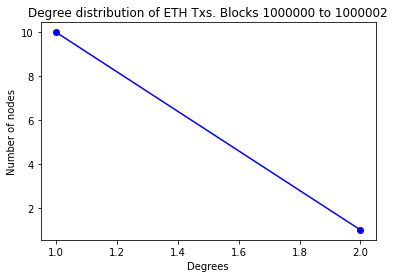

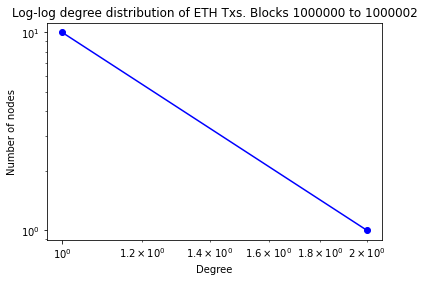

<Figure size 432x288 with 0 Axes>

[('0x2a65aca4d5fc5b5c859090a6c34d164135398226', 2), ('0x39fa8c5f2793459d6622857e7d9fbb4bd91766d3', 1), ('0xc083e9947cf02b8ffc7d3090ae9aea72df98fd47', 1), ('0x32be343b94f860124dc4fee278fdcbd38c102d88', 1), ('0xdf190dc7190dfba737d7777a163445b7fff16133', 1), ('0x819f4b08e6d3baa33ba63f660baed65d2a6eb64c', 1), ('0x2910543af39aba0cd09dbb2d50200b3e800a63d2', 1), ('0x9e486ad335492959c38a0740cb66c55ad30bb4f0', 1), ('0x10d5bff7879b7eb5192b3374338bb834981910a8', 1), ('0xc6c764fc6c1e1211d2b4a06ef2170f660a4512fa', 1), ('0x53e0551a1e31a40855bc8e086eb8db803a625bbf', 1)]
0x2a65aca4d5fc5b5c859090a6c34d164135398226


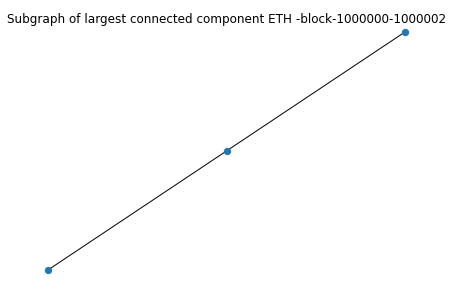

In [20]:
#G = nx.read_edgelist(graph_file,comments='#', delimiter=' ')
G = nx.read_edgelist(dataset_file_named,comments='#', delimiter=' ')
G.name = cryptotype+"-block-" + first_block_number +"-to-"+ last_block_number+"-Tx-network"
print("network info")
print(nx.info(G))
print("number of nodes ")
print(nx.number_of_nodes(G))
print("number of edges ")
print(nx.number_of_edges(G))
print("is directed? ")
print(nx.is_directed(G))
print("degree per node ")
print(nx.degree(G))
degrees = G.degree()
degree_values = [v for k, v in degrees]
print(degree_values)
unique_degree_values = list(set(degree_values))
print(unique_degree_values)
#nx.draw(G)
#nx.draw_circular(G) #different layouts
#plt.show()
plot_deg_dist(G, graph_filec,graph_filelogc,graph_fileclusc, cryptotype, first_block_number, last_block_number)


with open(output_graph_infoc, 'w') as outdatafile:
	outdatafile.write("Cryptotype: "+ cryptotype)
	outdatafile.write("\n")
	outdatafile.write("Block numbers:" + first_block_number +"-"+ last_block_number)
	outdatafile.write("\n")
	outdatafile.write(nx.info(G))
	outdatafile.write("\n")
	outdatafile.write("Average clustering:")
	outdatafile.write (str(nx.average_clustering(G)))
	outdatafile.write("\n")
	outdatafile.write("Density:")
	outdatafile.write (str(nx.density(G)))
	outdatafile.write("\n")
	outdatafile.write("Degree assortativity:")
	outdatafile.write (str(nx.degree_assortativity_coefficient(G)))
	outdatafile.write("\n")

	major = sorted(G.degree, key=lambda x: x[1], reverse=True)
#	G2 = nx.ego_graph(G,major[0],radius=3, center=True, undirected=True, distance=None)
	print(major)
	print(major[0][0])
	G2 = nx.ego_graph(G,major[0][0],radius=5, center=True, undirected=True)
	from networkx.drawing.nx_agraph import graphviz_layout
#	nx.draw(G2, pos=graphviz_layout(G2))
	nx.draw(G2, node_size=40)
	plt.suptitle('Subgraph of largest connected component '+cryptotype+' -block-' + first_block_number +'-'+ last_block_number )
	plt.savefig(graph_filesubgc)
	plt.show()



	if nx.is_connected(G):
		outdatafile.write("Graph is connected")
		outdatafile.write("Diameter:")
		outdatafile.write (str(nx.diameter(G)))
		outdatafile.write("\n")
	else:
		outdatafile.write("Graph is not connected. Diameter calculation not possible")
		#outdatafile.write("\n")
		component=0
		for g in connected_component_subgraphs(G): 
			component+=1
			#outdatafile.write("\n")
			#outdatafile.write("Shortest path length per component:")
			#outdatafile.write(str(nx.average_shortest_path_length(g))) 
			#outdatafile.write("\n")
			#outdatafile.write("Diameter per component:")
			#outdatafile.write(str(nx.diameter(g))) 
			#outdatafile.write("\n")
			##outdatafile.write("Eccentricity per component:")
			##outdatafile.write(str(nx.eccentricity(g))) 
			#outdatafile.write("\n")
		outdatafile.write("\n")
		outdatafile.write("Number of components in this network: "+ str(component))

In [ ]:
type(min(degrees))

tuple

In [ ]:
min = 9999
max = 0
my_array = []
for value, degree in degrees:
  if degree > max:
    max = degree
  if degree < min:
    min = degree
  for i in range(degree):
    my_array.append(degree)

print (min)
print(max)

1
140


(array([2268.,  157.,    0.,    0.,    0.,  161.,    0.,    0.,    0.,
         140.]),
 array([  1. ,  14.9,  28.8,  42.7,  56.6,  70.5,  84.4,  98.3, 112.2,
        126.1, 140. ]),
 <a list of 10 Patch objects>)

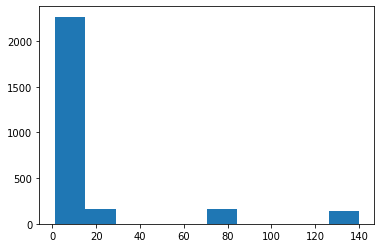

In [ ]:
plt.hist(my_array)

In [ ]:
pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-cp36-none-any.whl size=24788 sha256=b6acc53999a25161b7976a74da2175257cb2b0ffe9c97b1565ed699b9a7632be
  Stored in directory: /root/.cache/pip/wheels/e0/27/02/08d0e2865072bfd8d7c655e290521e3feca3fc22f1ac460601
Successfully built powerlaw


In [ ]:
import powerlaw
#data = [1.7, 3.2, 4.5, 6.2, 5.7] # data can be list or numpy array
data = my_array
results = powerlaw.Fit(data)
print("results.power_law.alpha")
print(results.power_law.alpha)
print("results.power_law.xmin")
print(results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Calculating best minimal value for power law fit
/usr/local/lib/python3.6/dist-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


results.power_law.alpha
1.9081756873595728
results.power_law.xmin
1.0


/usr/local/lib/python3.6/dist-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


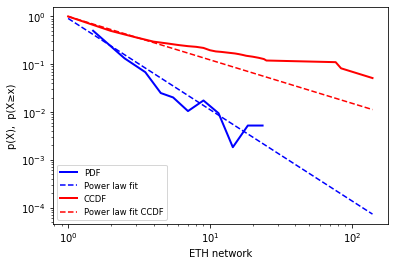

In [ ]:
figCCDF = results.plot_pdf(color='b', linewidth=2, label='PDF')
results.power_law.plot_pdf(color='b', linestyle='--', ax=figCCDF, label='Power law fit')
results.plot_ccdf(color='r', linewidth=2, ax=figCCDF, label='CCDF' )
results.power_law.plot_ccdf(color='r', linestyle='--', ax=figCCDF, label='Power law fit CCDF')
####
figCCDF.set_ylabel(u"p(X),  p(X≥x)")
figCCDF.set_xlabel(r"ETH network")

handles, labels = figCCDF.get_legend_handles_labels()
#figCCDF.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))
figCCDF.legend(handles, labels, loc='lower left', fontsize='small')

fig = plt.gcf()

#fig.savefig('fig1.pdf')
fig.savefig('ETH-powerlaw.png')


In [ ]:

figname = 'FigCCDF'

<Figure size 432x288 with 0 Axes>

In [ ]:
cryptotype = "ETH"

output_graph_info= str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"-"+cryptotype+"-block-" + first_block_number +"-to-"+ last_block_number + "-output-graph-info.txt"
output_graph_infoc= os.path.join(completeinputfiled, output_graph_info)

dataset_file_names = dataset_file_name[:-4]

graph_file= dataset_file_names +"-degree-distribution" + ".png"
graph_filec= os.path.join(completeinputfiled, graph_file)

graph_filelog= dataset_file_names + "-log-log-degree-distribution" + ".png"
graph_filelogc= os.path.join(completeinputfiled, graph_filelog)

graph_fileclus= dataset_file_names +"-clustering-coef-distribution" + ".png" 
graph_fileclusc= os.path.join(completeinputfiled, graph_fileclus)

graph_filesubg= dataset_file_names +"-subgraph-largest-connected-component" + ".png"
graph_filesubgc= os.path.join(completeinputfiled, graph_filesubg)



if not os.path.exists(destdir):
	os.mkdir(destdir)
else:
	pass

G = nx.read_edgelist(dataset_file_named,comments='#', delimiter=' ')
G.name = cryptotype+"-block-" + first_block_number +"-to-"+ last_block_number+"-Tx-network"
print("network info")
print(nx.info(G))
print("number of nodes ")
print(nx.number_of_nodes(G))
print("number of edges ")
print(nx.number_of_edges(G))
print("is directed? ")
print(nx.is_directed(G))
print("degree per node ")
print(nx.degree(G))
degrees = G.degree()
degree_values = [v for k, v in degrees]
print(degree_values)
unique_degree_values = list(set(degree_values))
print(unique_degree_values)
#nx.draw(G)
#nx.draw_circular(G) #different layouts
#plt.show()
plot_deg_dist(G, graph_filec,graph_filelogc,graph_fileclusc, cryptotype, first_block_number, last_block_number)


with open(output_graph_infoc, 'w') as outdatafile:
	outdatafile.write("Cryptotype: "+ cryptotype)
	outdatafile.write("\n")
	outdatafile.write("Block numbers:" + first_block_number +"-"+ last_block_number)
	outdatafile.write("\n")
	outdatafile.write(nx.info(G))
	outdatafile.write("\n")
	outdatafile.write("Average clustering:")
	outdatafile.write (str(nx.average_clustering(G)))
	outdatafile.write("\n")
	outdatafile.write("Density:")
	outdatafile.write (str(nx.density(G)))
	outdatafile.write("\n")
	outdatafile.write("Degree assortativity:")
	outdatafile.write (str(nx.degree_assortativity_coefficient(G)))
	outdatafile.write("\n")

	major = sorted(G.degree, key=lambda x: x[1], reverse=True)
#	G2 = nx.ego_graph(G,major[0],radius=3, center=True, undirected=True, distance=None)
	print(major)
	print(major[0][0])
	G2 = nx.ego_graph(G,major[0][0],radius=5, center=True, undirected=True)
	from networkx.drawing.nx_agraph import graphviz_layout
#	nx.draw(G2, pos=graphviz_layout(G2))
	nx.draw(G2, node_size=40)
	plt.suptitle('Subgraph of largest connected component '+cryptotype+' -block-' + first_block_number +'-'+ last_block_number )
	plt.savefig(graph_filesubgc)
	plt.show()



	if nx.is_connected(G):
		outdatafile.write("Graph is connected")
		outdatafile.write("Diameter:")
		outdatafile.write (str(nx.diameter(G)))
		outdatafile.write("\n")
	else:
		outdatafile.write("Graph is not connected. Diameter calculation not possible")
		#outdatafile.write("\n")
		component=0
		for g in connected_component_subgraphs(G): 
			component+=1
			#outdatafile.write("\n")
			#outdatafile.write("Shortest path length per component:")
			#outdatafile.write(str(nx.average_shortest_path_length(g))) 
			#outdatafile.write("\n")
			#outdatafile.write("Diameter per component:")
			#outdatafile.write(str(nx.diameter(g))) 
			#outdatafile.write("\n")
			##outdatafile.write("Eccentricity per component:")
			##outdatafile.write(str(nx.eccentricity(g))) 
			#outdatafile.write("\n")
		outdatafile.write("\n")
		outdatafile.write("Number of components in this network: "+ str(component))

FileNotFoundError: ignored

In [ ]:
# functionality code just to speed up the deletion of files in the virtual execution machine in colab
# please use with care
import shutil
shutil.rmtree(completeNamed)

In [ ]:
# practical way to download all created files
# careful this way does not work 
import shutil
from google.colab import files

zipname = str(ts_now.year)+str(ts_now.month)+str(ts_now.day)+"ETH-txs"
zipnamec = completeNamed + "/" +zipname 

print (zipname)
print (zipnamec)
print (completeNamed)

shutil.make_archive(zipnamec, 'zip', completeNamed)

zipnamefull = zipnamec + ".zip"

print(zipnamefull)

files.download(zipnamefull)


20201226ETH-txs
/content/20201226-outcome/20201226ETH-txs
/content/20201226-outcome


KeyboardInterrupt: ignored

!zip -r zipnamec completeNamed

In [ ]:
!zip -r 20201226-1ETH-txs.zip /content/20201226-outcome


  adding: content/20201226-outcome/ (stored 0%)
  adding: content/20201226-outcome/20201226-ETH-block-11531960-to-11531970-json-from-and-to.txt (deflated 63%)
  adding: content/20201226-outcome/20201226-ETH-block-11531960-to-11531970-json-from-and-to-clustering-coef-distribution.png (deflated 13%)
  adding: content/20201226-outcome/20201226-ETH-block-11531960-to-11531970-json-from-and-to-subgraph-largest-connected-component.png (deflated 4%)
  adding: content/20201226-outcome/20201226-ETH-block-11531960-to-11531970-json-from-and-to-log-log-degree-distribution.png (deflated 6%)
  adding: content/20201226-outcome/20201226-ETH-block-11531900-to-11531970-json-from-and-to-log-log-degree-distribution.png (deflated 4%)
  adding: content/20201226-outcome/20201226-ETH-block-11531960-to-11531970-output-graph-info.txt (deflated 34%)
  adding: content/20201226-outcome/20201226-ETH-block-11531900-to-11531970-json-from-and-to-subgraph-largest-connected-component.png (deflated 1%)
  adding: content/2

In [ ]:
from google.colab import files
files.download('20201226-1ETH-txs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>